<a href="https://colab.research.google.com/github/Anteii/HPC-Labs/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
from IPython.display import clear_output

## CUDA

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [3]:
!nvidia-smi

Mon Oct 31 18:06:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!git clone https://github.com/NVIDIA/cuda-samples.git
!make -C /content/cuda-samples/Samples/1_Utilities/deviceQueryDrv/
!/content/cuda-samples/bin/x86_64/linux/release/deviceQueryDrv

Cloning into 'cuda-samples'...
remote: Enumerating objects: 11024, done.
remote: Counting objects: 100% (11024/11024), done.
remote: Compressing objects: 100% (1850/1850), done.
remote: Total 11024 (delta 9174), reused 10979 (delta 9148), pack-reused 0
Receiving objects: 100% (11024/11024), 127.02 MiB | 26.53 MiB/s, done.
Resolving deltas: 100% (9174/9174), done.
Checking out files: 100% (3615/3615), done.
make: Entering directory '/content/cuda-samples/Samples/1_Utilities/deviceQueryDrv'
/usr/local/cuda/bin/nvcc -ccbin g++ -I../../../Common  -m64    --threads 0 --std=c++11 -gencode arch=compute_35,code=compute_35 -o deviceQueryDrv.o -c deviceQueryDrv.cpp
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_35,code=compute_35 -o deviceQueryDrv deviceQueryDrv.

In [5]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
clear_output()

In [6]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


## FFTW

In [2]:
!wget https://www.fftw.org/fftw-3.3.10.tar.gz

--2022-10-31 19:23:09--  https://www.fftw.org/fftw-3.3.10.tar.gz
Resolving www.fftw.org (www.fftw.org)... 216.137.187.110
Connecting to www.fftw.org (www.fftw.org)|216.137.187.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4144100 (4.0M) [application/octet-stream]
Saving to: ‘fftw-3.3.10.tar.gz’

fftw-3.3.10.tar.gz  100%[===================>]   3.95M  5.54MB/s    in 0.7s    

2022-10-31 19:23:10 (5.54 MB/s) - ‘fftw-3.3.10.tar.gz’ saved [4144100/4144100]



In [3]:
!tar -xf fftw-3.3.10.tar.gz

In [4]:
!/content/fftw-3.3.10/configure

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether to enable maintainer-specific portions of Makefiles... no
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking whether make supports the include directiv

In [5]:
!make install -C /content/

make: Entering directory '/content'
Making install in support
make[1]: Entering directory '/content/support'
make[2]: Entering directory '/content/support'
make[2]: Nothing to be done for 'install-exec-am'.
make[2]: Nothing to be done for 'install-data-am'.
make[2]: Leaving directory '/content/support'
make[1]: Leaving directory '/content/support'
Making install in kernel
make[1]: Entering directory '/content/kernel'
/bin/bash ../libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I. -I/content/fftw-3.3.10/kernel -I..  -I /content/fftw-3.3.10   -O3 -fomit-frame-pointer -mtune=native -malign-double -fstrict-aliasing -fno-schedule-insns -MT align.lo -MD -MP -MF .deps/align.Tpo -c -o align.lo /content/fftw-3.3.10/kernel/align.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I/content/fftw-3.3.10/kernel -I.. -I /content/fftw-3.3.10 -O3 -fomit-frame-pointer -mtune=native -malign-double -fstrict-aliasing -fno-schedule-insns -MT align.lo -MD -MP -MF .deps/align.Tpo -c /content/fftw-3.3.10/ke

In [6]:
!find /content/ -iname rftw3.h

In [7]:
!ls /usr/local/lib

cmake				libmkl_scalapack_lp64.so
libfftw3.a			libmkl_sequential.so
libfftw3.la			libmkl_tbb_thread.so
libiomp5_db.so			libmkl_vml_avx2.so
libiomp5.so			libmkl_vml_avx512_mic.so
libiompstubs5.so		libmkl_vml_avx512.so
libmkl_avx2.so			libmkl_vml_avx.so
libmkl_avx512_mic.so		libmkl_vml_cmpt.so
libmkl_avx512.so		libmkl_vml_def.so
libmkl_avx.so			libmkl_vml_mc2.so
libmkl_blacs_intelmpi_ilp64.so	libmkl_vml_mc3.so
libmkl_blacs_intelmpi_lp64.so	libmkl_vml_mc.so
libmkl_blacs_openmpi_ilp64.so	libomp-fallback-cstring.o
libmkl_blacs_openmpi_lp64.so	libomp-fallback-cstring.spv
libmkl_blacs_sgimpt_ilp64.so	libomp-spirvdevicertl-optional.o
libmkl_blacs_sgimpt_lp64.so	libomp-spirvdevicertl-required.o
libmkl_cdft_core.so		libomptarget-opencl-optional.bc
libmkl_core.so			libomptarget-opencl-required.bc
libmkl_def.so			libomptarget.rtl.level0.so
libmkl_gf_ilp64.so		libomptarget.rtl.opencl.so
libmkl_gf_lp64.so		libomptarget.rtl.x86_64.so
libmkl_gnu_thread.so		libomptarget.so
libmkl_intel_ilp64.so		libomp

In [8]:
!make check

Making check in support
make[1]: Entering directory '/content/support'
make[1]: Nothing to be done for 'check'.
make[1]: Leaving directory '/content/support'
Making check in kernel
make[1]: Entering directory '/content/kernel'
make[1]: Nothing to be done for 'check'.
make[1]: Leaving directory '/content/kernel'
Making check in simd-support
make[1]: Entering directory '/content/simd-support'
make[1]: Nothing to be done for 'check'.
make[1]: Leaving directory '/content/simd-support'
Making check in dft
make[1]: Entering directory '/content/dft'
Making check in scalar
make[2]: Entering directory '/content/dft/scalar'
Making check in codelets
make[3]: Entering directory '/content/dft/scalar/codelets'
make  check-am
make[4]: Entering directory '/content/dft/scalar/codelets'
make[4]: Nothing to be done for 'check-am'.
make[4]: Leaving directory '/content/dft/scalar/codelets'
make[3]: Leaving directory '/content/dft/scalar/codelets'
make[3]: Entering directory '/content/dft/scalar'
make[3]: N

## General

In [9]:
!mkdir source
!mkdir music

In [10]:
!wget http://mauvecloud.net/sounds/pcm1608m.wav -O music/laugh.wav

--2022-10-31 19:26:09--  http://mauvecloud.net/sounds/pcm1608m.wav
Resolving mauvecloud.net (mauvecloud.net)... 67.195.197.24
Connecting to mauvecloud.net (mauvecloud.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107042 (105K) [audio/x-wav]
Saving to: ‘music/laugh.wav’

music/laugh.wav     100%[===================>] 104.53K   467KB/s    in 0.2s    

2022-10-31 19:26:09 (467 KB/s) - ‘music/laugh.wav’ saved [107042/107042]



In [11]:
!mkdir easybmp
!wget http://prdownloads.sourceforge.net/easybmp/EasyBMP_1.06.zip?download -O easybmp/easybmp.zip

--2022-10-31 19:26:10--  http://prdownloads.sourceforge.net/easybmp/EasyBMP_1.06.zip?download
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/easybmp/easybmp/EasyBMP%20Library%20Files%20Version%201.06/EasyBMP_1.06.zip?download= [following]
--2022-10-31 19:26:10--  http://downloads.sourceforge.net/project/easybmp/easybmp/EasyBMP%20Library%20Files%20Version%201.06/EasyBMP_1.06.zip?download=
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://deac-riga.dl.sourceforge.net/project/easybmp/easybmp/EasyBMP%20Library%20Files%20Version%201.06/EasyBMP_1.06.zip [following]
--2022-10-31 19

In [12]:
!unzip easybmp/easybmp.zip -d easybmp/

Archive:  easybmp/easybmp.zip
  inflating: easybmp/BSD_(revised)_license.txt  
  inflating: easybmp/EasyBMP.cpp     
  inflating: easybmp/EasyBMP.h       
  inflating: easybmp/EasyBMP_BMP.h   
  inflating: easybmp/EasyBMP_ChangeLog.txt  
  inflating: easybmp/EasyBMP_DataStructures.h  
  inflating: easybmp/EasyBMP_VariousBMPutilities.h  
   creating: easybmp/sample/
  inflating: easybmp/sample/EasyBMPbackground.bmp  
  inflating: easybmp/sample/EasyBMPsample.cpp  
  inflating: easybmp/sample/EasyBMPtext.bmp  
  inflating: easybmp/sample/makefile  


# WAV structures

In [13]:
%%writefile source/musicFile.h
#include "stdint.h"
#pragma once

typedef struct WAV_RIFF {
    char ChunkID[4];
    uint32_t ChunkSize; 
    char Format[4]; 
} RIFF_t;

typedef struct WAV_FMT {
    char Subchunk1ID[4];
    uint32_t Subchunk1Size; /* 16 for PCM */
    uint16_t AudioFormat;   /* PCM = 1*/
    uint16_t NumChannels;
    uint32_t SampleRate;  
    uint32_t ByteRate;  // SampleRate * NumChannels * BitsPerSample/8
    uint16_t BlockAlign;    // NumChannels * BitsPerSample
    uint16_t BitsPerSample; 
} FMT_t;

typedef struct WAV_data {
    char Subchunk2ID[4];   /* "data" */
    uint32_t Subchunk2Size; /* data size */
} Data_t;

typedef struct WAV_fotmat {
   RIFF_t riff;
   FMT_t fmt;
   Data_t data;
} Wav;



typedef struct{
		// WAV-формат начинается с RIFF-заголовка:

		// Содержит символы "RIFF" в ASCII кодировке
		// (0x52494646 в big-endian представлении)
		char chunkId[4];

		// 36 + subchunk2Size, или более точно:
		// 4 + (8 + subchunk1Size) + (8 + subchunk2Size)
		// Это оставшийся размер цепочки, начиная с этой позиции.
		// Иначе говоря, это размер файла - 8, то есть,
		// исключены поля chunkId и chunkSize.
		unsigned long chunkSize;

		// Содержит символы "WAVE"
		// (0x57415645 в big-endian представлении)
		char format[4];

		// Формат "WAVE" состоит из двух подцепочек: "fmt " и "data":
		// Подцепочка "fmt " описывает формат звуковых данных:

		// Содержит символы "fmt "
		// (0x666d7420 в big-endian представлении)
		char subchunk1Id[4];

		// 16 для формата PCM.
		// Это оставшийся размер подцепочки, начиная с этой позиции.
		unsigned long subchunk1Size;

		// Аудио формат, полный список можно получить здесь http://audiocoding.ru/wav_formats.txt
		// Для PCM = 1 (то есть, Линейное квантование).
		// Значения, отличающиеся от 1, обозначают некоторый формат сжатия.
		unsigned short audioFormat;

		// Количество каналов. Моно = 1, Стерео = 2 и т.д.
		unsigned short numChannels;

		// Частота дискретизации. 8000 Гц, 44100 Гц и т.д.
		unsigned long sampleRate;

		// sampleRate * numChannels * bitsPerSample/8
		unsigned long byteRate;

		// numChannels * bitsPerSample/8
		// Количество байт для одного сэмпла, включая все каналы.
		unsigned short blockAlign;

		// Так называемая "глубиная" или точность звучания. 8 бит, 16 бит и т.д.
		unsigned short bitsPerSample;

		// Подцепочка "data" содержит аудио-данные и их размер.

		// Содержит символы "data"
		// (0x64617461 в big-endian представлении)
		char subchunk2Id[4];

		// numSamples * numChannels * bitsPerSample/8
		// Количество байт в области данных.
		unsigned long subchunk2Size;

		// Далее следуют непосредственно Wav данные.
} WAVHEADER;

Writing source/musicFile.h


#CuFFT

In [12]:
%%writefile source/cudaHelper.h
#include <cufft.h>

#pragma once

const char* cufftGetErrorString(cufftResult error) {
  switch (error) {
    case CUFFT_SUCCESS:
      return "CUFFT_SUCCESS";

    case CUFFT_INVALID_PLAN:
      return "CUFFT_INVALID_PLAN";

    case CUFFT_ALLOC_FAILED:
      return "CUFFT_ALLOC_FAILED";

    case CUFFT_INVALID_TYPE:
      return "CUFFT_INVALID_TYPE";

    case CUFFT_INVALID_VALUE:
      return "CUFFT_INVALID_VALUE";

    case CUFFT_INTERNAL_ERROR:
      return "CUFFT_INTERNAL_ERROR";

    case CUFFT_EXEC_FAILED:
      return "CUFFT_EXEC_FAILED";

    case CUFFT_SETUP_FAILED:
      return "CUFFT_SETUP_FAILED";

    case CUFFT_INVALID_SIZE:
      return "CUFFT_INVALID_SIZE";

    case CUFFT_UNALIGNED_DATA:
      return "CUFFT_UNALIGNED_DATA";

    case CUFFT_INCOMPLETE_PARAMETER_LIST:
      return "CUFFT_INCOMPLETE_PARAMETER_LIST";

    case CUFFT_INVALID_DEVICE:
      return "CUFFT_INVALID_DEVICE";

    case CUFFT_PARSE_ERROR:
      return "CUFFT_PARSE_ERROR";

    case CUFFT_NO_WORKSPACE:
      return "CUFFT_NO_WORKSPACE";

    case CUFFT_NOT_IMPLEMENTED:
      return "CUFFT_NOT_IMPLEMENTED";

    case CUFFT_LICENSE_ERROR:
      return "CUFFT_LICENSE_ERROR";

    case CUFFT_NOT_SUPPORTED:
      return "CUFFT_NOT_SUPPORTED";
  }

  return "<unknown>";
}

void cudaCheckError(cudaError_t error){
	if (error != cudaSuccess){
		printf("Error: %s\n", cudaGetErrorString(error));
		exit(1);
	}
}

void cufftCheckError(cufftResult error){
	if (error != CUFFT_SUCCESS){
		printf("Error: %s\n", cufftGetErrorString(error));
		exit(1);
	}
}


Writing source/cudaHelper.h


In [181]:
%%writefile source/cufft.cu
#include <cuda_runtime.h>
#include <cufft.h>
#include <iostream>
#include <cmath>
#include <cuComplex.h>

#include "cudaHelper.h"
#include "musicFile.h"
#include "EasyBMP.h"

__global__ void calculateMG(cufftReal *data, int N, cufftComplex *buffer){
  int i = threadIdx.x + blockIdx.x * blockDim.x;

  if (i < N){
    cufftComplex num = buffer[i];
    data[i] = sqrt( cuCabsf(num) / sqrt((double)2*N) / 2) / 2;
  }
}

void readWav(const char *path, char **data, uint32_t *dataSize){
    FILE *fp = NULL;

    Wav wav;
    RIFF_t riff;
    FMT_t fmt;
    Data_t wavData;

    fp = fopen(path, "rb");

    if (!fp) {
        printf("can't open audio file\n");
        exit(1);
    }

    fread(&wav, sizeof(wav), 1, fp);
    printf("Filename %s\n", path);

    riff = wav.riff;
    fmt = wav.fmt;
    wavData = wav.data;

    *dataSize = wavData.Subchunk2Size;

    *data = (char*)malloc(*dataSize);
    fread(*data, wavData.Subchunk2Size, 1, fp);
    

    printf("ChunkID \t%c%c%c%c\n", riff.ChunkID[0], riff.ChunkID[1], riff.ChunkID[2], riff.ChunkID[3]);
    printf("ChunkSize \t%d\n", riff.ChunkSize);
    printf("Format \t\t%c%c%c%c\n", riff.Format[0], riff.Format[1], riff.Format[2], riff.Format[3]);

    printf("\n");

    printf("Subchunk1ID \t%c%c%c%c\n", fmt.Subchunk1ID[0], fmt.Subchunk1ID[1], fmt.Subchunk1ID[2], fmt.Subchunk1ID[3]);
    printf("Subchunk1Size \t%d\n", fmt.Subchunk1Size);
    printf("AudioFormat \t%d\n", fmt.AudioFormat);
    printf("NumChannels \t%d\n", fmt.NumChannels);
    printf("SampleRate \t%d\n", fmt.SampleRate);
    printf("ByteRate \t%d\n", fmt.ByteRate);
    printf("BlockAlign \t%d\n", fmt.BlockAlign);
    printf("BitsPerSample \t%d\n", fmt.BitsPerSample);

    printf("\n");

    printf("blockID \t%c%c%c%c\n", wavData.Subchunk2ID[0], wavData.Subchunk2ID[1], wavData.Subchunk2ID[2], wavData.Subchunk2ID[3]);
    printf("blockSize \t%d\n", wavData.Subchunk2Size);

    printf("\n");

    printf("duration \t%d\n", wavData.Subchunk2Size / fmt.ByteRate);
}

void normalize(cufftReal *data, int n){
  cufftReal max = 0;
  cufftReal min = 0;
  for (int i = 0; i < n; i++) {
      if (data[i] > max) {
          max = data[i];
      }
      if (data[i] < min) {
          min = data[i];
      }
  }

  //printf("%f %f\n", min, max);

  if (fabs(max - min) < 1e-13){
    return;
  }

  for (int i = 0; i < n; i++) {
      data[i] = (data[i] - min) / (max - min);
  }
}

void plot_layer(int x, BMP *img, cufftReal *layer, int n){
  
  normalize(layer, n);

  //printf("%d\n", x);

  for(int j = 0; j < n; ++j){
      RGBApixel pixel;
      pixel.Red = 0;
      //printf("%f\n", layer[j]);
      pixel.Green = 255 * layer[j];
      pixel.Blue = 0;
      pixel.Alpha = 0;

      img->SetPixel(x, j, pixel);
  }
}

template<int gridX, int blockX>
void computeFT(cufftReal *data, int N, cufftComplex *buffer, cufftHandle *plan){
  cufftCheckError(cufftExecR2C(*plan, data, buffer));
  calculateMG<<<gridX, blockX>>>(data, N, buffer);
}

template<int gridX, int blockX>
float* spectrogram(uint16_t *data, uint32_t dataSize, 
                int windowSize, int stride,
                const char* fileName){

  int numSamples = dataSize / sizeof(uint16_t);
  int freqNum = windowSize / 2 + 1;
  int iterations = int(1.0f * (numSamples - windowSize - 1) / stride) + 1;
  int windowSizeInBytes = windowSize * sizeof(cufftReal);

  printf("Samples: \t%d\nChunk Length: \t%d\n", numSamples, windowSize);
  printf(": \t\t%d\n", iterations);
  
  cufftReal *tmpData;
  cufftReal *data_device;
  cufftReal *in_device;
  cufftReal *windowBuff;
  cufftComplex *out_device;

  float *totalTimes;
  float calculationTime, transerTime;
  cudaEvent_t startEvent, stopEvent;

  cudaCheckError(cudaEventCreate(&startEvent));
  cudaCheckError(cudaEventCreate(&stopEvent));

  totalTimes = (float*)malloc(2 * sizeof(float));
  totalTimes[0] = totalTimes[1] = 0;
  tmpData = (cufftReal*)malloc(numSamples * sizeof(cufftReal));
  windowBuff = (cufftReal*)malloc(freqNum * sizeof(cufftReal));
  cudaCheckError(cudaMalloc(&data_device, numSamples * sizeof(cufftReal)));
  cudaCheckError(cudaMalloc(&in_device, windowSize * sizeof(cufftReal)));
  cudaCheckError(cudaMalloc(&out_device, freqNum * sizeof(cufftComplex)));
  
  for (int i = 0; i < numSamples; ++i){
    tmpData[i] = data[i];
  }

  cudaCheckError(cudaMemcpy(data_device, tmpData, numSamples * sizeof(cufftReal), cudaMemcpyHostToDevice));

  BMP img;
  int height = freqNum;
  int width = iterations;

  img.SetSize(width, height);

  cufftHandle plan;
  
  // BATCH size is actually ignored as it is a depricated parameter
  cufftCheckError(cufftPlan1d(&plan, windowSize, CUFFT_R2C, 1)); 

  for(int i = 0; i * stride < numSamples - windowSize; ++i){
    // Copy window to buffer (device to device)
    cudaCheckError(cudaEventRecord(startEvent, 0));
    cudaCheckError(cudaMemcpy(in_device, data_device + i * stride, windowSize * sizeof(cufftReal), cudaMemcpyDeviceToDevice));
    cudaCheckError(cudaEventRecord(stopEvent, 0));

    cudaCheckError(cudaDeviceSynchronize());
    cudaCheckError(cudaEventElapsedTime(&transerTime, startEvent, stopEvent));

    totalTimes[0] += transerTime;

    // Calculate STFT
    cudaCheckError(cudaEventRecord(startEvent, 0));
    computeFT<gridX, blockX>(in_device, windowSize, out_device, &plan);
    cudaCheckError(cudaEventRecord(stopEvent, 0));

    cudaCheckError(cudaDeviceSynchronize());
    cudaCheckError(cudaEventElapsedTime(&calculationTime, startEvent, stopEvent));

    totalTimes[1] += calculationTime;

    // Copy window from device
    cudaCheckError(cudaEventRecord(startEvent, 0));
    cudaCheckError(cudaMemcpy(windowBuff, in_device, freqNum * sizeof(cufftReal), cudaMemcpyDeviceToHost));
    cudaCheckError(cudaEventRecord(stopEvent, 0));

    cudaCheckError(cudaDeviceSynchronize());
    cudaCheckError(cudaEventElapsedTime(&transerTime, startEvent, stopEvent));

    totalTimes[0] += transerTime;

    // Plot Spectrum
    plot_layer(i, &img, windowBuff, freqNum);
  
  }

  img.WriteToFile(fileName);

  free(tmpData);
  free(windowBuff);

  cufftCheckError(cufftDestroy(plan));
  cudaCheckError(cudaFree(data_device));
  cudaCheckError(cudaFree(in_device));
  cudaCheckError(cudaFree(out_device));

  return totalTimes;
}

int main(){

    WAVHEADER* wh = (WAVHEADER*)malloc(sizeof(WAVHEADER));

    const char *fileName = "/content/music/laugh.wav";
    char *data = NULL;
    uint16_t *ddata = NULL;
    uint32_t dataSize;

    readWav(fileName, &data, &dataSize);

    ddata = (uint16_t*)data;
    
    const int windowSize = 8192;
    const int stride = 1;

    const int blockX = 128;
    const int gridX = int(1.0f * (windowSize - 1) / blockX) + 1;

    float* elapsedTime = spectrogram<gridX, blockX>(ddata, dataSize, windowSize, stride, "CUFFT.bmp");
    printf("Spectrogram created in %f!\n", elapsedTime[0] + elapsedTime[1]);
    printf("Transfer time: \t\t%f\nCalculations time: \t%f\n", elapsedTime[0], elapsedTime[1]);

    free(elapsedTime);
    free(data);

    return 0;
}

Overwriting source/cufft.cu


In [182]:
!nvcc source/cufft.cu easybmp/EasyBMP.cpp -o source/cufft -lcufft -lcudart -I/content/cuda-samples/Common -I/content/source -I/content/easybmp

source/cufft.cu(128): warning: variable "windowSizeInBytes" was declared but never referenced



In [ ]:
!./source/cufft

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(figsize=(20, 100))
img = plt.imread("CUFFT.bmp")
split = 100
split_size = 512
ax.imshow(img[:,split*split_size:(split+1)*split_size])

# FFTW

In [40]:
%%writefile source/fftw.cpp

#include "stdio.h"
#include "stdlib.h"
#include "fftw3.h"
#include "math.h"
#include "musicFile.h"
#include "EasyBMP.h"
#include <ctime>

void readWav(const char *path, char **data, uint32_t *dataSize){
    FILE *fp = NULL;

    Wav wav;
    RIFF_t riff;
    FMT_t fmt;
    Data_t wavData;

    fp = fopen(path, "rb");

    if (!fp) {
        printf("can't open audio file\n");
        exit(1);
    }

    fread(&wav, sizeof(wav), 1, fp);
    printf("Filename %s\n", path);

    riff = wav.riff;
    fmt = wav.fmt;
    wavData = wav.data;

    *dataSize = wavData.Subchunk2Size;

    *data = (char*)malloc(*dataSize);
    fread(*data, wavData.Subchunk2Size, 1, fp);
    

    printf("ChunkID \t%c%c%c%c\n", riff.ChunkID[0], riff.ChunkID[1], riff.ChunkID[2], riff.ChunkID[3]);
    printf("ChunkSize \t%d\n", riff.ChunkSize);
    printf("Format \t\t%c%c%c%c\n", riff.Format[0], riff.Format[1], riff.Format[2], riff.Format[3]);

    printf("\n");

    printf("Subchunk1ID \t%c%c%c%c\n", fmt.Subchunk1ID[0], fmt.Subchunk1ID[1], fmt.Subchunk1ID[2], fmt.Subchunk1ID[3]);
    printf("Subchunk1Size \t%d\n", fmt.Subchunk1Size);
    printf("AudioFormat \t%d\n", fmt.AudioFormat);
    printf("NumChannels \t%d\n", fmt.NumChannels);
    printf("SampleRate \t%d\n", fmt.SampleRate);
    printf("ByteRate \t%d\n", fmt.ByteRate);
    printf("BlockAlign \t%d\n", fmt.BlockAlign);
    printf("BitsPerSample \t%d\n", fmt.BitsPerSample);

    printf("\n");

    printf("blockID \t%c%c%c%c\n", wavData.Subchunk2ID[0], wavData.Subchunk2ID[1], wavData.Subchunk2ID[2], wavData.Subchunk2ID[3]);
    printf("blockSize \t%d\n", wavData.Subchunk2Size);

    printf("\n");

    printf("duration \t%d\n", wavData.Subchunk2Size / fmt.ByteRate);
}

void normalize(double *data, int n){
  double max = 0;
  double min = 0;
  for (int i = 0; i < n; i++) {
      if (data[i] > max) {
          max = data[i];
      }
      if (data[i] < min) {
          min = data[i];
      }
  }

  for (int i = 0; i < n; i++) {
      data[i] = (data[i] - min) / max;
  }
}

void copyToFFTW(uint16_t *input, uint32_t n, fftw_complex *dest){
    for (int i = 0; i < n; ++i){
        dest[i][0] = input[i];
        dest[i][1] = 0.0f;
    }
}

void copy(uint16_t *input, uint32_t n, double *dest){
    for (int i = 0; i < n; ++i){
        dest[i] = input[i];
    }
}

void copyFromFFTW(fftw_complex *input, uint32_t n, double *dest){
  for (int i = 0; i < n; ++i){
      dest[i] = std::sqrt(input[i][0] * input[i][0] + input[i][1] * input[i][1]);
  }
}

void plot_layer(int x, BMP *img, double *layer, int n){
  normalize(layer, n);

  for(int j = 0; j < n; ++j){
      RGBApixel pixel;
      pixel.Red = 0;
      pixel.Green = 255 * layer[j];
      pixel.Blue = 0;
      pixel.Alpha = 0;
      img->SetPixel(x, j, pixel);
  }
}

void computeFT(double *in, int n, fftw_complex *out, fftw_plan *plan){
  
  fftw_execute(*plan);

  copyFromFFTW(out, n / 2 + 1, in);

  for (int i = 0; i < n / 2 + 1; ++i) {
        in[i] = std::sqrt(in[i] / sqrt(2*n) / 2) / 2;
  }

}

float plot_spectrogram(uint16_t *data, uint32_t dataSize, int windowSize, int stride,
                      const char* fileName){
  
  clock_t start, end;
  

  int numSamples = dataSize / sizeof(uint16_t);
  int freqNum = windowSize / 2 + 1;
  int iterations = int(1.0f * (numSamples - windowSize - 1) / stride) + 1;
  fftw_complex *out;
  double *in;

  printf("Samples: \t%d\nChunk Length: \t%d\n", numSamples, windowSize);
  printf("Steps: \t\t%d\n", iterations);

  BMP img;
  int height = freqNum;
  int width = iterations;

  img.SetSize(width, height);

  in = (double*)malloc(numSamples*sizeof(double));
  out = (fftw_complex*)fftw_malloc(freqNum*sizeof(fftw_complex));

  fftw_plan plan = fftw_plan_dft_r2c_1d(windowSize, in, out, FFTW_ESTIMATE);

  start = clock();

  for(int i = 0; i * stride < numSamples - windowSize; ++i){
    copy(data + i * stride, windowSize, in);
    //printf("1\n");
    computeFT(in, windowSize, out, &plan);
    //printf("2\n");
    plot_layer(i, &img, in, freqNum);
  }

  end = clock();

  free(in);

  fftw_destroy_plan(plan);
  fftw_free(out);
  fftw_cleanup();

  img.WriteToFile(fileName);

  return 1000.0f * (end - start) / CLOCKS_PER_SEC;
}

int main(){
    
    WAVHEADER* wh = (WAVHEADER*)malloc(sizeof(WAVHEADER));

    const char *fileName = "/content/music/laugh.wav";
    char *data = NULL;
    uint16_t *ddata = NULL;
    uint32_t dataSize;

    readWav(fileName, &data, &dataSize);

    ddata = (uint16_t*)data;

    const int windowSize = 8192;
    const int stride = 1;

    // In ms
    float elapsedTime = plot_spectrogram(ddata, dataSize, windowSize, stride, "FFTW.bmp");

    printf("Spectrogram created in %f!\n", elapsedTime);
    
    free(wh);
    free(data);

    return 0;
}

Overwriting source/fftw.cpp


In [41]:
!g++ -O2 source/fftw.cpp easybmp/EasyBMP.cpp -o source/fftw -lm -lfftw3 -I/content/easybmp

source/fftw.cpp: In function ‘void readWav(const char*, char**, uint32_t*)’:
source/fftw.cpp:25:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(&wav, sizeof(wav), 1, fp);
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~
source/fftw.cpp:35:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(*data, wavData.Subchunk2Size, 1, fp);
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
!./source/fftw

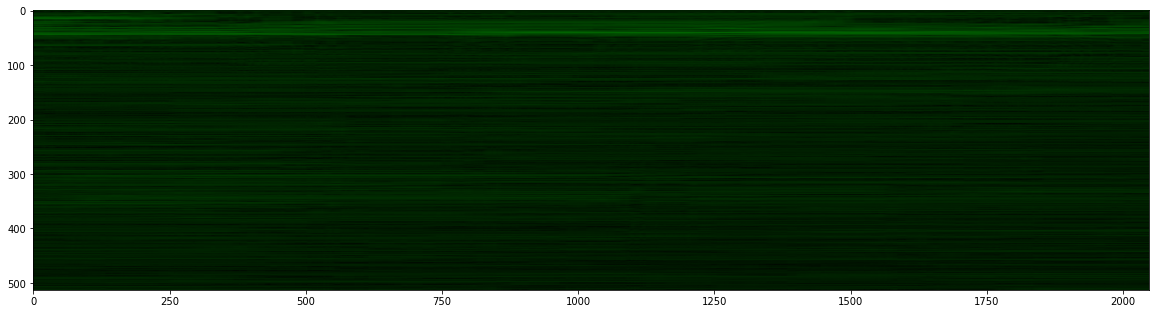

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(figsize=(20, 100))
img = plt.imread("FFTW.bmp")
split = 1
split_size = 2048
ax.imshow(img[:,split*split_size:(split+1)*split_size])

#Visualization

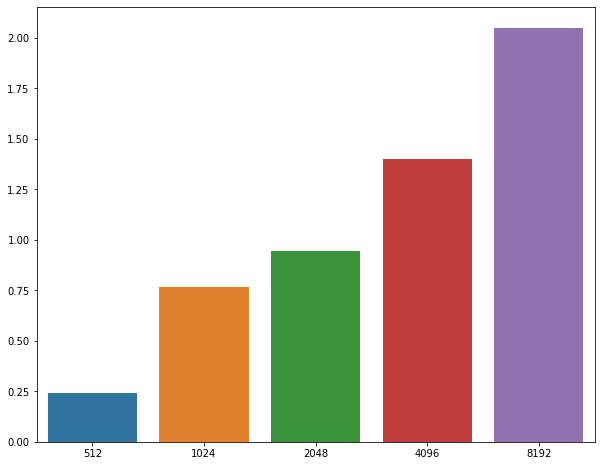

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


window_sizes = np.array([512, 1024, 2048, 4096, 8192])

samples = 53499

cufftw_transfer_times = np.array([803.990356, 841.185913, 876.784851, 1006.320984, 1063.593506])
cufftw_calc_times = np.array([568.997070, 584.653625, 656.100098, 963.638000, 1648.321289])

cufftw_total_times = cufftw_transfer_times + cufftw_calc_times

fftw_times = np.array([328.635986, 1093.181030, 1451.177979, 2762.346924, 5560.175293])


_, ax = plt.subplots(figsize=(10, 8))

#sns.barplot(x=window_sizes, y=fftw_times, ax=ax);
#sns.barplot(x=window_sizes, y=cufftw_total_times, ax=ax);
sns.barplot(x=window_sizes, y=fftw_times / cufftw_total_times, ax=ax);

# Stash

In [ ]:
%%writefile source/cufft.cu
#include <cuda_runtime.h>
#include <cufft.h>
#include <iostream>
#include <cmath>
#include <cuComplex.h>

#include "cudaHelper.h"
#include "musicFile.h"
#include "EasyBMP.h"

#define NX 256
#define BATCH 100

__global__ void calculateMG(cufftReal *data, int N, cufftComplex *buffer){
  int i = threadIdx.x + blockIdx.x * blockDim.x;

  if (i < N){
    cufftComplex num = buffer[i];
    data[i] = sqrt( cuCabsf(num) / sqrt((double)2*N) / 2) / 2;
  }
}

void readWav(const char *path, char **data, uint32_t *dataSize){
    FILE *fp = NULL;

    Wav wav;
    RIFF_t riff;
    FMT_t fmt;
    Data_t wavData;

    fp = fopen(path, "rb");

    if (!fp) {
        printf("can't open audio file\n");
        exit(1);
    }

    fread(&wav, sizeof(wav), 1, fp);
    printf("Filename %s\n", path);

    riff = wav.riff;
    fmt = wav.fmt;
    wavData = wav.data;

    *dataSize = wavData.Subchunk2Size;

    *data = (char*)malloc(*dataSize);
    fread(*data, wavData.Subchunk2Size, 1, fp);
    

    printf("ChunkID \t%c%c%c%c\n", riff.ChunkID[0], riff.ChunkID[1], riff.ChunkID[2], riff.ChunkID[3]);
    printf("ChunkSize \t%d\n", riff.ChunkSize);
    printf("Format \t\t%c%c%c%c\n", riff.Format[0], riff.Format[1], riff.Format[2], riff.Format[3]);

    printf("\n");

    printf("Subchunk1ID \t%c%c%c%c\n", fmt.Subchunk1ID[0], fmt.Subchunk1ID[1], fmt.Subchunk1ID[2], fmt.Subchunk1ID[3]);
    printf("Subchunk1Size \t%d\n", fmt.Subchunk1Size);
    printf("AudioFormat \t%d\n", fmt.AudioFormat);
    printf("NumChannels \t%d\n", fmt.NumChannels);
    printf("SampleRate \t%d\n", fmt.SampleRate);
    printf("ByteRate \t%d\n", fmt.ByteRate);
    printf("BlockAlign \t%d\n", fmt.BlockAlign);
    printf("BitsPerSample \t%d\n", fmt.BitsPerSample);

    printf("\n");

    printf("blockID \t%c%c%c%c\n", wavData.Subchunk2ID[0], wavData.Subchunk2ID[1], wavData.Subchunk2ID[2], wavData.Subchunk2ID[3]);
    printf("blockSize \t%d\n", wavData.Subchunk2Size);

    printf("\n");

    printf("duration \t%d\n", wavData.Subchunk2Size / fmt.ByteRate);
}

void normalize(cufftReal *data, int n){
  cufftReal max = 0;
  cufftReal min = 0;
  for (int i = 0; i < n; i++) {
      if (data[i] > max) {
          max = data[i];
      }
      if (data[i] < min) {
          min = data[i];
      }
  }

  //printf("%f %f\n", min, max);

  if (fabs(max - min) < 1e-13){
    return;
  }

  for (int i = 0; i < n; i++) {
      data[i] = (data[i] - min) / (max - min);
  }
}

void plot_layer(int x, BMP *img, cufftReal *layer, int n){
  
  normalize(layer, n);

  //printf("%d\n", x);

  for(int j = 0; j < n; ++j){
      RGBApixel pixel;
      pixel.Red = 0;
      //printf("%f\n", layer[j]);
      pixel.Green = 255 * layer[j];
      pixel.Blue = 0;
      pixel.Alpha = 0;

      img->SetPixel(x, j, pixel);
  }
}

template<int gridX, int blockX>
void computeFT(cufftReal *data, int N, cufftComplex *buffer, cufftHandle *plan){
  cufftCheckError(cufftExecR2C(*plan, data, buffer));
  calculateMG<<<gridX, blockX>>>(data, N, buffer);
}


template<int gridX, int blockX>
float spectrogram(uint16_t *data, uint32_t dataSize, 
                int windowSize, int stride,
                const char* fileName){

  int numSamples = dataSize / sizeof(uint16_t);
  int freqNum = windowSize / 2 + 1;
  int iterations = int(1.0f * (numSamples - windowSize - 1) / stride) + 1;
  int windowSizeInBytes = windowSize * sizeof(cufftReal);

  printf("Samples: \t%d\nChunk Length: \t%d\n", numSamples, windowSize);
  printf("Steps: \t\t%d\n", iterations);

  cufftReal *tmpData = (cufftReal*)malloc(numSamples * sizeof(cufftReal));

  for (int i = 0; i < numSamples; ++i){
    tmpData[i] = data[i];
  }


  cufftReal *data_device;
  cufftReal *in_device;
  cufftReal *windowBuff;
  cufftComplex *out_device;
  cufftReal *deviceBuffer;
  cufftReal *hostBuffer;

  float totalTime;
  cudaEvent_t startEvent, stopEvent;

  cudaCheckError(cudaEventCreate(&startEvent));
  cudaCheckError(cudaEventCreate(&stopEvent));

  windowBuff = (cufftReal*)malloc(freqNum * sizeof(cufftReal));
  hostBuffer = (cufftReal*)malloc(BATCH * freqNum * sizeof(cufftReal));
  cudaCheckError(cudaMalloc(&data_device, numSamples * sizeof(cufftReal)));
  cudaCheckError(cudaMalloc(&in_device, windowSize * sizeof(cufftReal)));
  cudaCheckError(cudaMalloc(&out_device, freqNum * sizeof(cufftComplex)));
  cudaCheckError(cudaMalloc(&deviceBuffer, BATCH * freqNum * sizeof(cufftReal)));

  cudaCheckError(cudaMemcpy(data_device, tmpData, numSamples * sizeof(cufftReal), cudaMemcpyHostToDevice));

  BMP img;
  int height = freqNum;
  int width = iterations;

  img.SetSize(width, height);

  printf("4\n");

  cufftHandle plan;
  
  // BATCH size is actually ignored as it is a depricated parameter
  cufftCheckError(cufftPlan1d(&plan, windowSize, CUFFT_R2C, BATCH)); 

  cudaCheckError(cudaEventRecord(startEvent, 0));

  for(int i = 0; i * stride < numSamples - windowSize; ++i){
    
    if (i != 0 && i % BATCH == 0){
        cudaCheckError(cudaMemcpy(hostBuffer, deviceBuffer, BATCH * freqNum * sizeof(cufftReal), cudaMemcpyDeviceToHost));
        cudaCheckError(cudaDeviceSynchronize());
        int idx = i / BATCH - 1;
        for (int j = 0; j < BATCH; ++j){
            plot_layer(idx * BATCH + j, &img, hostBuffer + j * freqNum, freqNum);
        }
    }
    
    cudaCheckError(cudaMemcpy(in_device, data_device + i * stride, windowSize * sizeof(cufftReal), cudaMemcpyDeviceToDevice));
    computeFT<gridX, blockX>(in_device, windowSize, out_device, &plan);
    
    cudaCheckError(cudaMemcpy(deviceBuffer + (i % BATCH) * freqNum, in_device, freqNum * sizeof(cufftReal), cudaMemcpyDeviceToDevice));
    //cudaCheckError(cudaMemcpy(windowBuff, deviceBuffer + (i % BATCH) * freqNum, freqNum * sizeof(cufftReal), cudaMemcpyDeviceToHost));
    //plot_layer(i, &img, windowBuff, freqNum);
    
    //cudaCheckError(cudaMemcpy(windowBuff, in_device, freqNum * sizeof(cufftReal), cudaMemcpyDeviceToHost));
    //plot_layer(i, &img, windowBuff, freqNum);
  
  }

  cudaCheckError(cudaEventRecord(stopEvent, 0));
  cudaCheckError(cudaDeviceSynchronize());
  cudaCheckError(cudaEventElapsedTime(&totalTime, startEvent, stopEvent));

  printf("6\n");

  img.WriteToFile(fileName);

  free(tmpData);
  free(windowBuff);
  free(hostBuffer);

  cufftCheckError(cufftDestroy(plan));
  cudaCheckError(cudaFree(data_device));
  cudaCheckError(cudaFree(in_device));
  cudaCheckError(cudaFree(out_device));
  cudaCheckError(cudaFree(deviceBuffer));

  return totalTime;
}

int main(){

    WAVHEADER* wh = (WAVHEADER*)malloc(sizeof(WAVHEADER));

    const char *fileName = "/content/music/laugh.wav";
    char *data = NULL;
    uint16_t *ddata = NULL;
    uint32_t dataSize;

    readWav(fileName, &data, &dataSize);

    ddata = (uint16_t*)data;
    
    const int windowSize = 1024;
    const int blockX = 128;
    const int gridX = int(1.0f * (windowSize - 1) / blockX) + 1;

    float elapsedTime = spectrogram<gridX, blockX>(ddata, dataSize, 1024, 1, "CUFFT.bmp");
    printf("Spectrogram created in %f!\n", elapsedTime);

    return 0;
}